<a href="https://www.kaggle.com/code/suyashkapil/titanic-neural-network-prediction?scriptVersionId=116285654" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [25]:
import tensorflow as tf
from tensorflow import keras
from keras import layers,callbacks
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [5]:
train =pd.read_csv('/kaggle/input/titanic/train.csv')
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
train2 = train.drop(columns = ['Name','Ticket','Cabin','PassengerId'])
col_emb = pd.factorize(train2['Embarked'])[0]
col_sex = pd.factorize(train2['Sex'])[0]
#Factorize assigned -1 to null values

In [8]:
col_age = train2['Age'].fillna(30) #np.mean(train['Age']): mean 29.699 i.e. 30
col1 = train2['Embarked'].fillna(0) #mean 0.35
train2['Age'] = col_age
train2['Embarked'] = col_emb
train2['Sex'] = col_sex
train2

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,0
887,1,1,1,19.0,0,0,30.0000,0
888,0,3,1,30.0,1,2,23.4500,0
889,1,1,0,26.0,0,0,30.0000,1


In [9]:
train2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


Sex
0    109
1    233
Name: Survived, dtype: int64


([<matplotlib.patches.Wedge at 0x7f8d67159290>,
 [Text(0.5931585112380521, 0.9263708655532393, 'Male'),
  Text(-0.5931584245049494, -0.9263709210887432, 'Female')],
 [Text(0.32354100612984654, 0.5052931993926759, '31.9%'),
  Text(-0.3235409588208814, -0.505293229684769, '68.1%')])

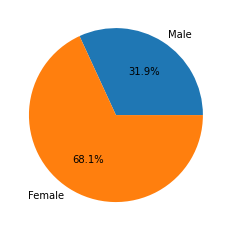

In [10]:
sex_surv = train2[(train2.Survived==1)].groupby('Sex').count()['Survived']
print(sex_surv)
plt.pie(sex_surv,labels=['Male','Female'],autopct='%0.1f%%')

68% of survivors were female.

Percentage of each sex survived
Sex
0    18.890815
1    74.203822
Name: Survived, dtype: float64


([<matplotlib.patches.Wedge at 0x7f8d6503abd0>,
 [Text(0.8839489990423482, 0.6547015862910605, 'MALE'),
  Text(-0.8839490296911406, -0.6547015449104205, 'FEMALE')],
 [Text(0.4821539994776444, 0.3571099561587602, '20.3%'),
  Text(-0.4821540161951675, -0.35710993358750204, '79.7%')])

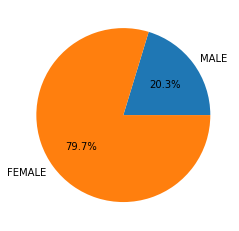

In [11]:
sex_count = train2.groupby('Sex').count()['Survived']
print('Percentage of each sex survived')
print((sex_surv/sex_count)*100)
plt.pie((sex_surv/sex_count)*100,labels=['MALE','FEMALE'],autopct='%0.1f%%')

74 % of females survived while 19% males survived

<AxesSubplot:>

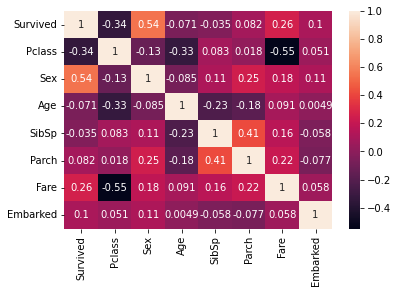

In [45]:
sns.heatmap(train2.corr(),annot=True)

* As expected, there is a lot of relation between PClass and Fare. Higher the class, lower the fare( higher price for upper class).
* 0.54 is the correlation between Survival and Sex. This shows sex had a good role in determination of whether someone survived or not.

         Survived
Pclass           
1       62.962963
2       47.282609
3       24.236253


<BarContainer object of 3 artists>

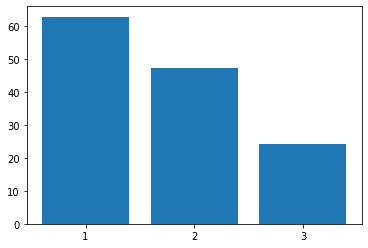

In [44]:
pclass_tot = train2.iloc[:,0:2].groupby('Pclass').count()
pclass_surv = train2.iloc[:,0:2][train2.Survived==1].groupby('Pclass').count()
pclass_surv_perc = pclass_surv/pclass_tot*100
print(pclass_surv_perc)
plt.bar(x=['1','2','3'],height=pclass_surv_perc.Survived)

* Higher percentage of people who boarded upper class survived than who boarded lower class.
* Higher the class, higher the survival rate.

In [57]:
print('Highest Fare : ' ,np.max(train2['Fare']))

Highest Fare :  512.3292


In [12]:
x = train2.drop(columns = ['Survived'])
y = train2['Survived']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

2023-01-13 16:45:02.893135: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-13 16:45:03.070048: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-13 16:45:03.070855: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-13 16:45:03.072666: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

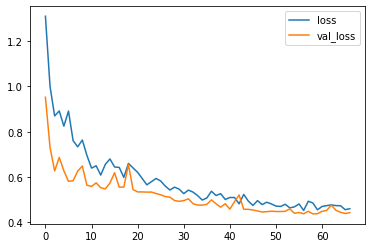

In [13]:
import warnings
warnings.filterwarnings("ignore")
#to avoid warnings

earlystop = callbacks.EarlyStopping(
     min_delta = 0.001,
     patience = 10,
     restore_best_weights = True,
)

model = keras.Sequential([
        layers.Dense(256,activation = 'relu'),
        layers.Dropout(0.2),
        layers.Dense(256,activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(1,activation='sigmoid'),
])
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['binary_accuracy']
)

fit = model.fit(
        x_train,y_train,
        validation_data=(x_test,y_test), 
        callbacks = [earlystop],
        batch_size = 64,
        epochs = 512,
        verbose = 0
)

history_df = pd.DataFrame(fit.history)
history_df.loc[:, ['loss', 'val_loss']].plot();

In [14]:
valid_score = model.predict(x_test) #using model on validation dataset
vs = valid_score.round(0)
val_sco = pd.DataFrame(vs,dtype=np.int)
val_sco #predictions using cross validation dataset

,0
0,0
1,1
2,0
3,0
4,0
...,...
174,0
175,1
176,0
177,0


In [15]:
accuracy_score(y_test,val_sco)
#An accuracy of 87% of validation data

0.8379888268156425

In [16]:
test = pd.read_csv('/kaggle/input/titanic/test.csv')
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [17]:
test2 = test.drop(columns = ['PassengerId','Name','Ticket','Cabin'])
test2

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,NaN,0,0,8.0500,S
414,1,female,39.0,0,0,108.9000,C
415,3,male,38.5,0,0,7.2500,S
416,3,male,NaN,0,0,8.0500,S


In [18]:
test2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


In [19]:
test_sex = pd.factorize(test2['Sex'])[0]
print('Mean Fare :',end=' ')
print(np.mean(test2['Fare']))
test_fare = test2['Fare'].fillna(35.6272)
print('Mean Age : ',end='')
print(np.mean(test2['Age']))
test_age = test2['Age'].fillna(30)
test_emb = pd.factorize(test2['Embarked'])[0]

Mean Fare : 35.627188489208635
Mean Age : 30.272590361445783


In [20]:
test2['Embarked'] = test_emb
test2['Age'] = test_age
test2['Sex'] = test_sex
test2['Fare'] = test_fare
test2

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.5,0,0,7.8292,0
1,3,1,47.0,1,0,7.0000,1
2,2,0,62.0,0,0,9.6875,0
3,3,0,27.0,0,0,8.6625,1
4,3,1,22.0,1,1,12.2875,1
...,...,...,...,...,...,...,...
413,3,0,30.0,0,0,8.0500,1
414,1,1,39.0,0,0,108.9000,2
415,3,0,38.5,0,0,7.2500,1
416,3,0,30.0,0,0,8.0500,1


In [21]:
test2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int64  
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 23.0 KB


In [22]:
pred = model.predict(test2)
final_pred = pred.round(0) #rounds off a number to 0 decimals(integer)

In [23]:
res = pd.DataFrame(final_pred,index = test['PassengerId'],dtype = np.int)
res #dataframe with all the predictions

,0
PassengerId,
892,0
893,0
894,0
895,0
896,1
...,...
1305,0
1306,1
1307,0


In [24]:
res.to_csv('submission.csv')
#accuracy 0.75 on kaggle